## Data Format
The following times are in the xx:yy - hour:minute format (e.g. 1536 means 3:36pm, 345 means 3:45am, 16 means 00:16am)

* scheduled_departure
* departure_time
* scheduled_arrival
* arrival_time
* wheels_off
* wheels_on


The following times are in minutes format (negatives mean actual_time is ahead of scheduled_time for the absolute value of that negative number)
* arrival_delay
* departure_delay
* taxi_in
* taxi_out
* scheduled_time
* elapsed_time
* air_time

Distance in miles

## Data Definition
* WHEELS_OFF Time - The time point that the aircraft's wheels leave the ground.
* WHEELS_ON Time - The time point that the aircraft's wheels touch on the ground.
* TAXI_OUT Time - The time duration elapsed between departure from the origin airport gate and wheels off.
* TAXI_IN Time - The time duration elapsed between wheels-on and gate arrival at the destination airport.
* AIR_TIME - The time duration between wheels_off and wheels_on time.

## Data Relationship
* arrival_time = wheels_on + taxi_in
* arrival_delay = arrival_time - scheduled_arrival
* departure_time = wheels_off - taxi_out
* departure_delay = departure_time - scheduled_departure
* elapsed_time =air_time + taxi_in + taxi_out
* air_time = wheels_on - wheels_off


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flights_df = pd.read_csv('../raw_data/flights.csv')
airports_df = pd.read_csv('../raw_data/airports.csv')
airlines_df = pd.read_csv('../raw_data/airlines.csv')

<ipython-input-2-a1bea3112058>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_df = pd.read_csv('../raw_data/flights.csv')


In [3]:
features = []

In [4]:
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flights_df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [6]:
flights_df.drop(columns = 'YEAR', inplace = True)

In [7]:
flights_df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [8]:
flights_df.MONTH.value_counts()

MONTH
7     520718
8     510536
3     504312
6     503897
5     496993
10    486165
4     485151
12    479230
1     469968
11    467972
9     464946
2     429191
Name: count, dtype: int64

<Axes: >

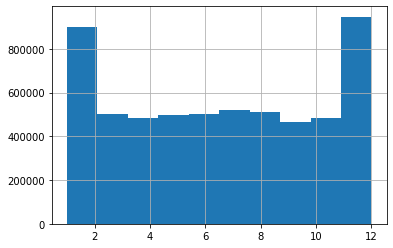

In [9]:
flights_df.MONTH.hist()

In [10]:
flights_df.MONTH.isna().any()

False

In [11]:
features.append('MONTH')
features

['MONTH']

No missing data in column Months, Also a lot more data in the months of January and December

<Axes: >

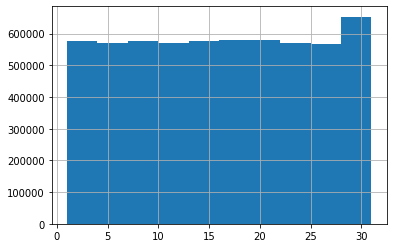

In [12]:
flights_df.DAY.hist()

In [13]:
flights_df.DAY.isna().any()

False

In [14]:
features.append('DAY')
features

['MONTH', 'DAY']

<Axes: >

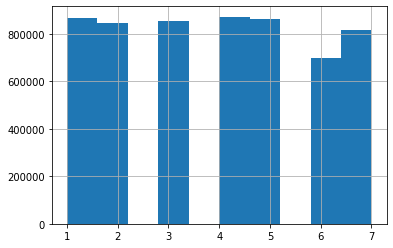

In [15]:
flights_df.DAY_OF_WEEK.hist()

In [16]:
flights_df.DAY_OF_WEEK.isna().any()

False

* 1 = Monday
* 7 = Sunday

No missign data in Day of the week column, there are pretty much the same number of flights throughout the week, there is slightly less number of flights in the 6th day of the week (Saturdays).

In [17]:
features.append('DAY_OF_WEEK')
features

['MONTH', 'DAY', 'DAY_OF_WEEK']

In [18]:
flights_df[['WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE','WHEELS_ON']]

,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON
0,15.0,205.0,194.0,169.0,1448,404.0
1,14.0,280.0,279.0,263.0,2330,737.0
2,34.0,286.0,293.0,266.0,2296,800.0
3,30.0,285.0,281.0,258.0,2342,748.0
4,35.0,235.0,215.0,199.0,1448,254.0
...,...,...,...,...,...,...
5819074,17.0,320.0,298.0,272.0,2611,749.0
5819075,12.0,227.0,215.0,195.0,1617,427.0
5819076,7.0,221.0,222.0,197.0,1598,424.0
5819077,3.0,161.0,157.0,144.0,1189,327.0


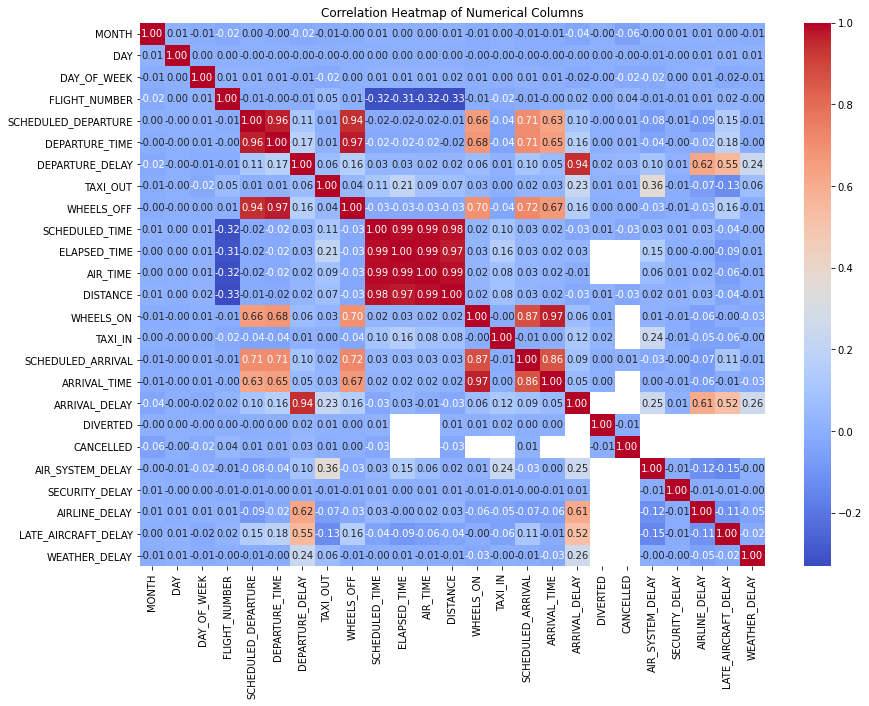

In [19]:
numerical_columns = flights_df.select_dtypes(include=[np.number])

correlation_matrix = numerical_columns.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

<Axes: >

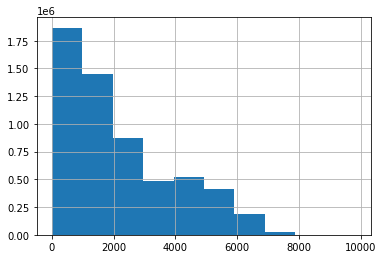

In [20]:
flights_df['FLIGHT_NUMBER'].hist()

In [21]:
flights_df.SCHEDULED_DEPARTURE.unique()

array([  5,  10,  20, ..., 421, 337, 409], dtype=int64)

In [22]:
flights_df.SCHEDULED_DEPARTURE.isna().any()

False

In [23]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 30 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE              object 
 4   FLIGHT_NUMBER        int64  
 5   TAIL_NUMBER          object 
 6   ORIGIN_AIRPORT       object 
 7   DESTINATION_AIRPORT  object 
 8   SCHEDULED_DEPARTURE  int64  
 9   DEPARTURE_TIME       float64
 10  DEPARTURE_DELAY      float64
 11  TAXI_OUT             float64
 12  WHEELS_OFF           float64
 13  SCHEDULED_TIME       float64
 14  ELAPSED_TIME         float64
 15  AIR_TIME             float64
 16  DISTANCE             int64  
 17  WHEELS_ON            float64
 18  TAXI_IN              float64
 19  SCHEDULED_ARRIVAL    int64  
 20  ARRIVAL_TIME         float64
 21  ARRIVAL_DELAY        float64
 22  DIVERTED             int64  
 23  CANCELLED            int64  
 24

No missing data in the column DAY, Also there are more flights in the last few days of the month (27th through 30th)

In [24]:
airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [25]:
airlines_df.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [26]:
flights_df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

Cancellation Codes

* (A) Air Carrier;
* (B) Extreme Weather;
* (C) National Aviation System (NAS); and
* (D) Security.

In [27]:
flights_df.CANCELLATION_REASON.unique()

array([nan, 'A', 'B', 'C', 'D'], dtype=object)

In [28]:
flights_df['CANCELLATION_REASON'].isna()

0          True
1          True
2          True
3          True
4          True
           ... 
5819074    True
5819075    True
5819076    True
5819077    True
5819078    True
Name: CANCELLATION_REASON, Length: 5819079, dtype: bool

In [29]:
flights_df['CANCELLATION_REASON'] = flights_df['CANCELLATION_REASON'].fillna('Not Canceled')

In [30]:
flights_df.CANCELLATION_REASON.unique()

array(['Not Canceled', 'A', 'B', 'C', 'D'], dtype=object)

In [31]:
flights_df.isna().any()

MONTH                  False
DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
FLIGHT_NUMBER          False
TAIL_NUMBER             True
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
DEPARTURE_TIME          True
DEPARTURE_DELAY         True
TAXI_OUT                True
WHEELS_OFF              True
SCHEDULED_TIME          True
ELAPSED_TIME            True
AIR_TIME                True
DISTANCE               False
WHEELS_ON               True
TAXI_IN                 True
SCHEDULED_ARRIVAL      False
ARRIVAL_TIME            True
ARRIVAL_DELAY           True
DIVERTED               False
CANCELLED              False
CANCELLATION_REASON    False
AIR_SYSTEM_DELAY        True
SECURITY_DELAY          True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
WEATHER_DELAY           True
dtype: bool

Canceled Flights do not have departure time

In [32]:
flights_df[flights_df['DEPARTURE_TIME'].isna()]['CANCELLED'].unique()

array([1], dtype=int64)

In [33]:
flights_df[flights_df['DEPARTURE_TIME'].isna()]

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,1,1,4,AS,136,N431AS,ANC,SEA,135,NaN,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
42,1,1,4,AA,2459,N3BDAA,PHX,DFW,200,NaN,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
68,1,1,4,OO,5254,N746SK,MAF,IAH,510,NaN,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
82,1,1,4,MQ,2859,N660MQ,SGF,DFW,525,NaN,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
90,1,1,4,OO,5460,N583SW,RDD,SFO,530,NaN,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818090,12,31,4,UA,1789,NaN,IAH,TPA,1955,NaN,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818157,12,31,4,UA,222,NaN,SFO,LAX,2000,NaN,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818318,12,31,4,AA,2245,N880AA,MIA,SAN,2019,NaN,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818777,12,31,4,NK,416,N522NK,FLL,IAG,2155,NaN,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN


In [34]:
cancelled_flights = flights_df[flights_df['DEPARTURE_TIME'].isna()]

In [35]:
df = flights_df[~flights_df['DEPARTURE_TIME'].isna()]

In [36]:
df.isna().any()

MONTH                  False
DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
FLIGHT_NUMBER          False
TAIL_NUMBER            False
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
DEPARTURE_TIME         False
DEPARTURE_DELAY        False
TAXI_OUT                True
WHEELS_OFF              True
SCHEDULED_TIME          True
ELAPSED_TIME            True
AIR_TIME                True
DISTANCE               False
WHEELS_ON               True
TAXI_IN                 True
SCHEDULED_ARRIVAL      False
ARRIVAL_TIME            True
ARRIVAL_DELAY           True
DIVERTED               False
CANCELLED              False
CANCELLATION_REASON    False
AIR_SYSTEM_DELAY        True
SECURITY_DELAY          True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
WEATHER_DELAY           True
dtype: bool

In [37]:
flights_df[flights_df['AIR_SYSTEM_DELAY'].isna()]

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,408.0,-22.0,0,0,Not Canceled,NaN,NaN,NaN,NaN,NaN
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,741.0,-9.0,0,0,Not Canceled,NaN,NaN,NaN,NaN,NaN
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,811.0,5.0,0,0,Not Canceled,NaN,NaN,NaN,NaN,NaN
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,756.0,-9.0,0,0,Not Canceled,NaN,NaN,NaN,NaN,NaN
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,259.0,-21.0,0,0,Not Canceled,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,...,753.0,-26.0,0,0,Not Canceled,NaN,NaN,NaN,NaN,NaN
5819075,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,...,430.0,-16.0,0,0,Not Canceled,NaN,NaN,NaN,NaN,NaN
5819076,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,...,432.0,-8.0,0,0,Not Canceled,NaN,NaN,NaN,NaN,NaN
5819077,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,...,330.0,-10.0,0,0,Not Canceled,NaN,NaN,NaN,NaN,NaN


<Axes: >

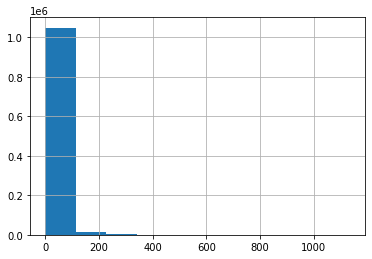

In [38]:
flights_df['AIR_SYSTEM_DELAY'].hist()

In [39]:
flights_df[['ARRIVAL_TIME','SCHEDULED_ARRIVAL','ARRIVAL_DELAY']]

,ARRIVAL_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,408.0,430,-22.0
1,741.0,750,-9.0
2,811.0,806,5.0
3,756.0,805,-9.0
4,259.0,320,-21.0
...,...,...,...
5819074,753.0,819,-26.0
5819075,430.0,446,-16.0
5819076,432.0,440,-8.0
5819077,330.0,340,-10.0


In [40]:
flights_df['TAXI_OUT'].unique()

array([ 21.,  12.,  16.,  15.,  11.,  18.,  13.,  17.,  28.,  25.,   9.,
        30.,  14.,  10.,  nan,  43.,  24.,  19.,  22.,  23.,  37.,  31.,
         7.,  32.,  26.,  33.,  42.,  27.,  20.,  38.,   4.,  29.,   8.,
        41.,  56.,  48.,  40.,  34.,   3.,  36.,  61.,  35.,   6.,  45.,
        39.,  46.,  62.,  49.,   5.,  57.,  64.,  63.,  47.,  54.,  55.,
        44.,  59.,  50.,  76., 113.,  73.,  58.,  52.,   2.,  72.,  51.,
       110.,  53.,  75.,  84.,  77.,  82.,  70., 105.,  69.,  71.,  81.,
        66.,  80.,  99.,  60.,  74.,  95.,  89., 136., 131.,  79.,  68.,
       120.,  67.,  88.,   1.,  65., 176., 160., 104., 111., 112.,  83.,
        85., 121., 100.,  91.,  97.,  93.,  87., 129.,  92.,  90.,  98.,
       107., 124., 146.,  86.,  78., 115., 103.,  94., 101., 102., 126.,
       116., 132., 118., 106., 130., 109., 114., 128.,  96., 141., 125.,
       149., 147., 122., 117., 108., 119., 137., 133., 135., 169., 152.,
       139., 143., 155., 153., 127., 150., 134., 14

In [41]:
flights_df.isna().sum()

MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON          0
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

<Axes: >

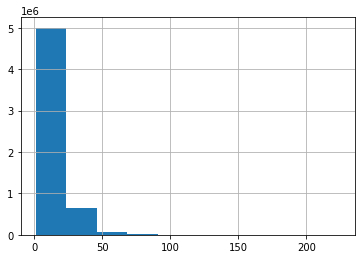

In [42]:
flights_df.TAXI_OUT.hist()

<Axes: >

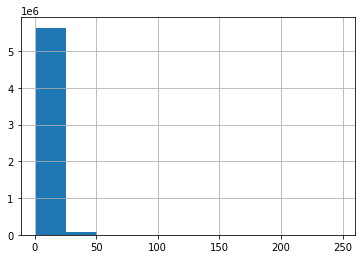

In [43]:
flights_df.TAXI_IN.hist()

<Axes: >

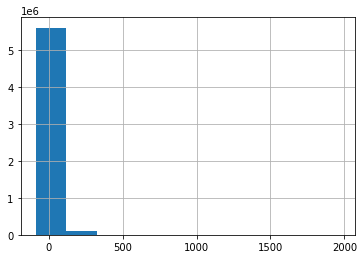

In [44]:
flights_df.ARRIVAL_DELAY.hist()

In [45]:
flights_df.ARRIVAL_DELAY.describe()

count    5.714008e+06
mean     4.407057e+00
std      3.927130e+01
min     -8.700000e+01
25%     -1.300000e+01
50%     -5.000000e+00
75%      8.000000e+00
max      1.971000e+03
Name: ARRIVAL_DELAY, dtype: float64

In [46]:
flights_df.describe()

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,5.819073e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,1.416859e+02,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,7.521058e+01,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,1.800000e+01,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,8.500000e+01,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,1.230000e+02,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,1.730000e+02,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [47]:
flights_df.CANCELLED.unique()

array([0, 1], dtype=int64)

In [48]:
delay_columns = ['DEPARTURE_DELAY','ARRIVAL_DELAY','DIVERTED','CANCELLED','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY','WEATHER_DELAY']

In [49]:
flights_df[delay_columns]

,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,-11.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,-8.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,-2.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,-5.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,-1.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5819074,-4.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN
5819075,-4.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN
5819076,-9.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN
5819077,-6.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN


In [50]:
flights_df[delay_columns].isna().any()

DEPARTURE_DELAY         True
ARRIVAL_DELAY           True
DIVERTED               False
CANCELLED              False
AIR_SYSTEM_DELAY        True
SECURITY_DELAY          True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
WEATHER_DELAY           True
dtype: bool

In [51]:
flights_df.isna().any()

MONTH                  False
DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
FLIGHT_NUMBER          False
TAIL_NUMBER             True
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
DEPARTURE_TIME          True
DEPARTURE_DELAY         True
TAXI_OUT                True
WHEELS_OFF              True
SCHEDULED_TIME          True
ELAPSED_TIME            True
AIR_TIME                True
DISTANCE               False
WHEELS_ON               True
TAXI_IN                 True
SCHEDULED_ARRIVAL      False
ARRIVAL_TIME            True
ARRIVAL_DELAY           True
DIVERTED               False
CANCELLED              False
CANCELLATION_REASON    False
AIR_SYSTEM_DELAY        True
SECURITY_DELAY          True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
WEATHER_DELAY           True
dtype: bool

In [52]:
flights_df.AIR_SYSTEM_DELAY.value_counts()

AIR_SYSTEM_DELAY
0.0      498613
1.0       28003
15.0      23199
2.0       22981
3.0       21446
          ...  
518.0         1
578.0         1
453.0         1
872.0         1
477.0         1
Name: count, Length: 570, dtype: int64

<Axes: >

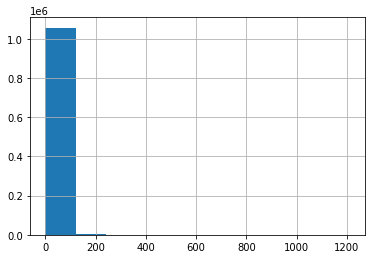

In [53]:
flights_df.WEATHER_DELAY.hist()

In [54]:
for column in flights_df.select_dtypes(include=[np.number]).columns:
    print(column)
    # flights_df[column].fillna(flights_df[column].mean(), inplace=True)

MONTH
DAY
DAY_OF_WEEK
FLIGHT_NUMBER
SCHEDULED_DEPARTURE
DEPARTURE_TIME
DEPARTURE_DELAY
TAXI_OUT
WHEELS_OFF
SCHEDULED_TIME
ELAPSED_TIME
AIR_TIME
DISTANCE
WHEELS_ON
TAXI_IN
SCHEDULED_ARRIVAL
ARRIVAL_TIME
ARRIVAL_DELAY
DIVERTED
CANCELLED
AIR_SYSTEM_DELAY
SECURITY_DELAY
AIRLINE_DELAY
LATE_AIRCRAFT_DELAY
WEATHER_DELAY


In [55]:
flights_df[flights_df['AIRPORT_ORIGIN'].isna()]

KeyError: 'AIRPORT_ORIGIN'

In [ ]:
flights_df.DIVERTED.value_counts()

DIVERTED
0    5803892
1      15187
Name: count, dtype: int64

In [ ]:
flights_df.CANCELLATION_REASON.value_counts()

CANCELLATION_REASON
Not Canceled    5729195
B                 48851
A                 25262
C                 15749
D                    22
Name: count, dtype: int64

In [ ]:
flights_df[flights_df['CANCELLED']==0][['CANCELLED','CANCELLATION_REASON']]

,CANCELLED,CANCELLATION_REASON
0,0,Not Canceled
1,0,Not Canceled
2,0,Not Canceled
3,0,Not Canceled
4,0,Not Canceled
...,...,...
5819074,0,Not Canceled
5819075,0,Not Canceled
5819076,0,Not Canceled
5819077,0,Not Canceled


In [ ]:
flights_df[['CANCELLED','CANCELLATION_REASON']].value_counts()

CANCELLED  CANCELLATION_REASON
0          Not Canceled           5729195
1          B                        48851
           A                        25262
           C                        15749
           D                           22
Name: count, dtype: int64

In [ ]:
flights_df[flights_df['CANCELLED']== 0][['CANCELLED','CANCELLATION_REASON']]

,CANCELLED,CANCELLATION_REASON
0,0,Not Canceled
1,0,Not Canceled
2,0,Not Canceled
3,0,Not Canceled
4,0,Not Canceled
...,...,...
5819074,0,Not Canceled
5819075,0,Not Canceled
5819076,0,Not Canceled
5819077,0,Not Canceled


In [ ]:
flights_df[flights_df['CANCELLATION_REASON'].isna()] = 'Not Cancelled'

In [ ]:
flights_df[['CANCELLED','CANCELLATION_REASON']].value_counts()

CANCELLED  CANCELLATION_REASON
0          Not Canceled           5729195
1          B                        48851
           A                        25262
           C                        15749
           D                           22
Name: count, dtype: int64

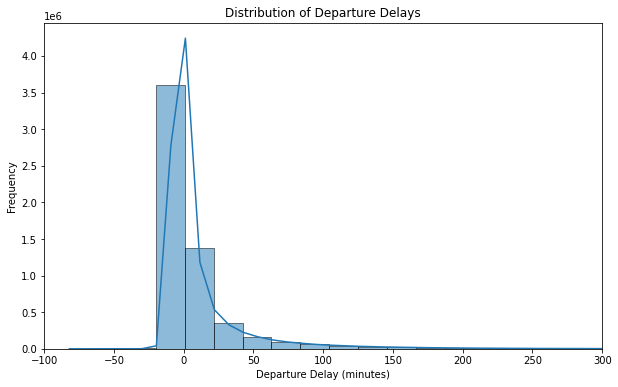

ValueError: Could not interpret input 'AIRLINE'

<Figure size 1008x504 with 0 Axes>

In [ ]:
# Data Cleaning
# Handling missing values by imputing with mean for numerical columns, and mode for categorical columns
for column in flights_df.select_dtypes(include=[np.number]).columns:
    flights_df[column].fillna(flights_df[column].mean(), inplace=True)

for column in flights_df.select_dtypes(include=[object]).columns:
    flights_df[column].fillna(flights_df[column].mode()[0], inplace=True)

# Convert data types where necessary
flights_df['FLIGHT_NUMBER'] = flights_df['FLIGHT_NUMBER'].astype(str)
flights_df['TAIL_NUMBER'] = flights_df['TAIL_NUMBER'].astype(str)

# Data Merging
# Merge flights data with airlines data
flights_df = flights_df.merge(airlines_df, how='left', left_on='AIRLINE', right_on='IATA_CODE').drop('IATA_CODE', axis=1)

# Merge flights data with origin and destination airport data
flights_df = flights_df.merge(airports_df, how='left', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE').drop('IATA_CODE', axis=1)
flights_df = flights_df.merge(airports_df, how='left', left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', suffixes=('_ORIGIN', '_DESTINATION')).drop('IATA_CODE', axis=1)

# EDA
# Distribution of departure delays
plt.figure(figsize=(10, 6))
sns.histplot(flights_df['DEPARTURE_DELAY'], bins=100, kde=True)
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(-100, 300)
plt.show()

# Average delay by airline
plt.figure(figsize=(14, 7))
sns.barplot(x='AIRLINE', y='DEPARTURE_DELAY', data=flights_df, estimator=np.mean)
plt.title('Average Departure Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=90)
plt.show()

# Average delay by month
plt.figure(figsize=(14, 7))
sns.barplot(x='MONTH', y='DEPARTURE_DELAY', data=flights_df, estimator=np.mean)
plt.title('Average Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()

# Average delay by airport
top_airports = flights_df['ORIGIN_AIRPORT'].value_counts().head(10).index
plt.figure(figsize=(14, 7))
sns.barplot(x='ORIGIN_AIRPORT', y='DEPARTURE_DELAY', data=flights_df[flights_df['ORIGIN_AIRPORT'].isin(top_airports)], estimator=np.mean)
plt.title('Average Departure Delay by Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=90)
plt.show()

# Save cleaned and merged data
flights_df.to_csv('/mnt/data/cleaned_flights_data.csv', index=False)


